In [95]:
from tensorflow import keras
import tensorflow as tf
fash_mnist = keras.datasets.fashion_mnist # 导入数据集
(train_images, train_labels), (test_images, test_labels) = fash_mnist.load_data() # 加载数据集 划分为训练集和测试集

In [85]:
train_labels.shape

(60000,)

In [87]:
import numpy as np
# import tensorflow as tf
# 查看训练集标签的不同类别
labels = np.unique(train_labels) # 获取训练集标签中的所有唯一类别
# print(labels)
num_classes = len(labels)
print("类别数:", num_classes)
# 定义类别名称
class_names = ['T恤', '裤子', '套衫', '裙子', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴']
# 打印每个类别的索引与对应的名称
for label in labels:
    print(f"类别 {label}: {class_names[label]}")

类别数: 10
类别 0: T恤
类别 1: 裤子
类别 2: 套衫
类别 3: 裙子
类别 4: 外套
类别 5: 凉鞋
类别 6: 衬衫
类别 7: 运动鞋
类别 8: 包
类别 9: 短靴


In [88]:
train_images.shape  # 六万张图像 大小为28*28

(60000, 28, 28)

In [8]:
len(train_images) # 60000张

60000

In [5]:
test_images.shape # 测试集为1W张

(10000, 28, 28)

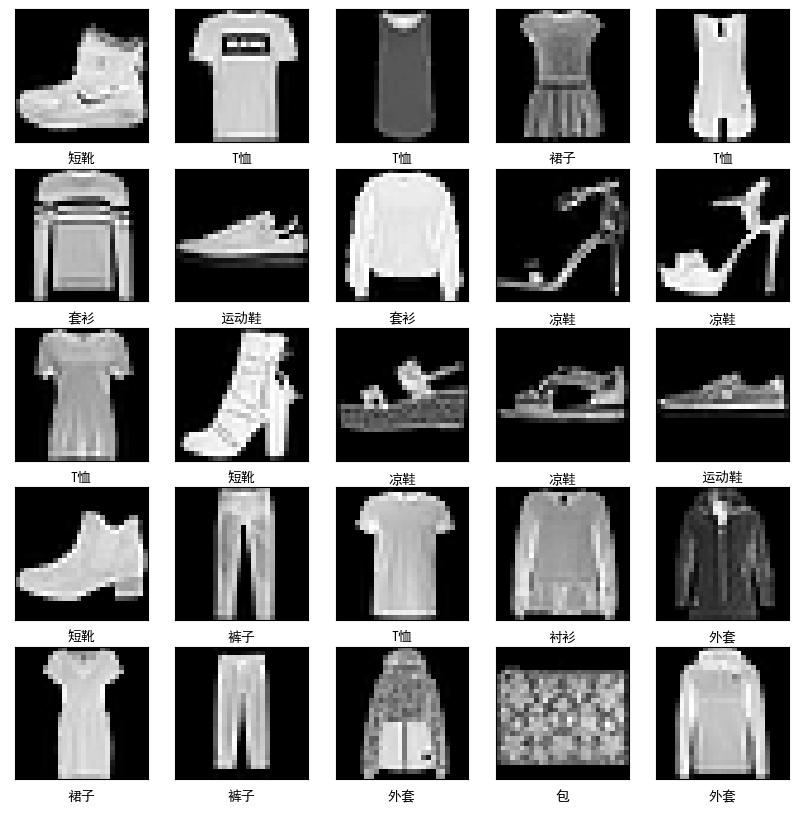

In [89]:
# 绘制训练集中的前 25 个图像及其标签
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.figure(figsize=(10,10))
for i in range(25):
    # print(train_images.shape)
    plt.subplot(5,5,i+1)
    plt.xticks([]) # 移除 x 轴上的刻度标签
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray') # 取出第i张图像   图像呈现为黑白
    plt.xlabel(class_names[train_labels[i]])
    # plt.axis('off') 不显示轴
plt.show()

In [90]:
# train_images = train_images/255 # 将像素值归一化到 [0, 1] 
# test_images = test_images/255

In [67]:
model = keras.Sequential([ # 创建一个序列模型
    keras.layers.Flatten(input_shape=(28,28)), # 展平为一维数据
    keras.layers.Dense(128,activation="relu"),  # 选取激活函数为Relu
    keras.layers.Dense(10,activation="softmax") # 接上softmax 做分类 得到具体的概率值
])

In [68]:
# model.compile(
#     optimizer="adam",
#     loss = "SparseCategoricalCrossentropy",
#     metrics=['accuracy']
# )

In [97]:
model.compile( # 对网络进行配置
    # optimizer="adam", # 优化器
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'] # 评价指标为acc
) 


In [96]:
train_images = train_images/255 # 像素值归一化到【0，1】
test_images = test_images/255 

In [98]:
model.fit(train_images,train_labels,epochs=10) # 

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1703 - accuracy: 0.9344
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1671 - accuracy: 0.9368
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1611 - accuracy: 0.9403
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1599 - accuracy: 0.9389
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1509 - accuracy: 0.9430
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1515 - accuracy: 0.9421
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1454 - accuracy: 0.9457
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1423 - accuracy: 0.9455
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1426 - accuracy: 0.9466
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.138

In [99]:
# 测试模型
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print(f"Accuracy on test set: {test_acc:.2%}")

313/313 - 1s - loss: 0.4212 - accuracy: 0.8855
Accuracy on test set: 88.55%


In [100]:
import numpy as np
# 使用模型进行预测
predictions = model.predict(test_images) # 调用predict进行预测
predictions.shape # 一万张图像 10个不同的值

(10000, 10)

In [102]:
predictions[0] # 取第一张图象  9.9912614e-01 ==0.999

array([7.5171050e-14, 2.8122351e-17, 1.3655535e-17, 7.6824304e-15,
       1.4655166e-14, 1.4230934e-06, 2.8775193e-10, 8.7246898e-04,
       2.3483757e-13, 9.9912614e-01], dtype=float32)

In [103]:
np.argmax(predictions[0]) # 取到最大值对应的索引 为9

9

In [104]:
import numpy as np
# 对预测结果进行处理
predicted_labels = np.argmax(predictions, axis=1) # 指定在列上操作 取标签
# 打印预测结果
print("Predicted labels:", predicted_labels)

Predicted labels: [9 2 1 ... 8 1 5]


In [78]:
# test_labels[0]

9

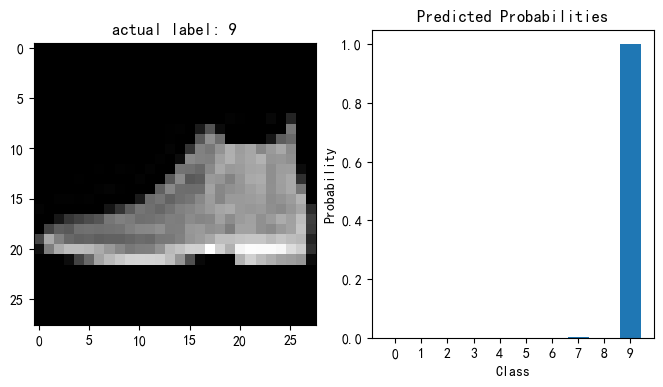

Predicted Label: 9


In [107]:
import matplotlib.pyplot as plt
# 获取第一张图像的预测结果
prediction = predictions[0]
predicted_label = np.argmax(prediction)
# 可视化预测结果
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_images[0], cmap='gray') # 取测试集的第一张图象 指定为灰度图
plt.title(f'actual label: {test_labels[0]}')

plt.subplot(1, 2, 2)
plt.bar(range(10), prediction)
plt.xticks(range(10))
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Predicted Probabilities')
plt.show()

print(f"Predicted Label: {predicted_label}")
